<a href="https://colab.research.google.com/github/Abirmai369/Sales-Summary/blob/main/sales_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Summary:
   product  total_qty  revenue
0   Apple         15     22.5
1  Banana         30     15.0
2  Grapes          8     16.0
3  Orange         25     25.0


<Figure size 800x500 with 0 Axes>

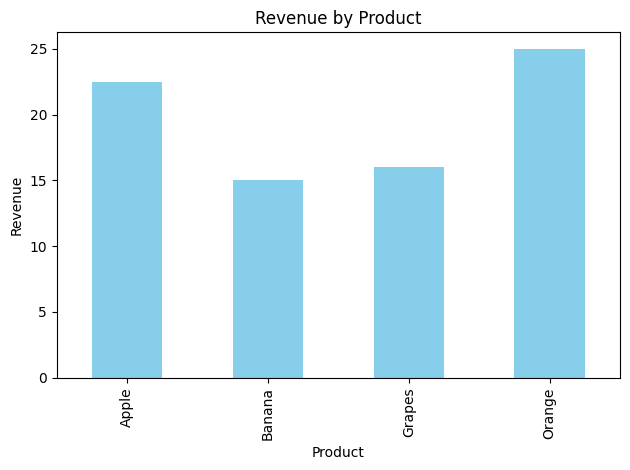

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os


db_filename = "sales_data.db"
if os.path.exists(db_filename):
    os.remove(db_filename)

conn = sqlite3.connect(db_filename)
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL)
""")

sales_data = [
    ("Apple", 10, 1.5),
    ("Banana", 20, 0.5),
    ("Orange", 15, 1.0),
    ("Apple", 5, 1.5),
    ("Banana", 10, 0.5),
    ("Orange", 10, 1.0),
    ("Grapes", 8, 2.0),]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()


query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print("Sales Summary:\n", df)


plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


conn.close()
